In [204]:
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [295]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i+n]

In [344]:
def plot_hist(filepath, axes=plt, max_sample=50):
    stats = pd.read_csv(filepath)
    stats = stats[stats['sample_size'] <= max_sample]
    # calculate normalization
    min_samplesize = stats.sample_size.min()
    max_samplesize = stats.sample_size.max()
    diff_samplesize = max_samplesize-min_samplesize
    print(max_samplesize)
    # generate color map
    cmap = matplotlib.cm.get_cmap('cubehelix_r')
    colors = cmap((stats.sample_size - min_samplesize)/float(diff_samplesize))
    colors[:,3] = 0.5
#     axes.register_cmap(cmap=cmap)
    # plot it
    axes.scatter(stats.distance_to_COM, stats.unique_combos, color=colors, zorder=5)


22
50
50


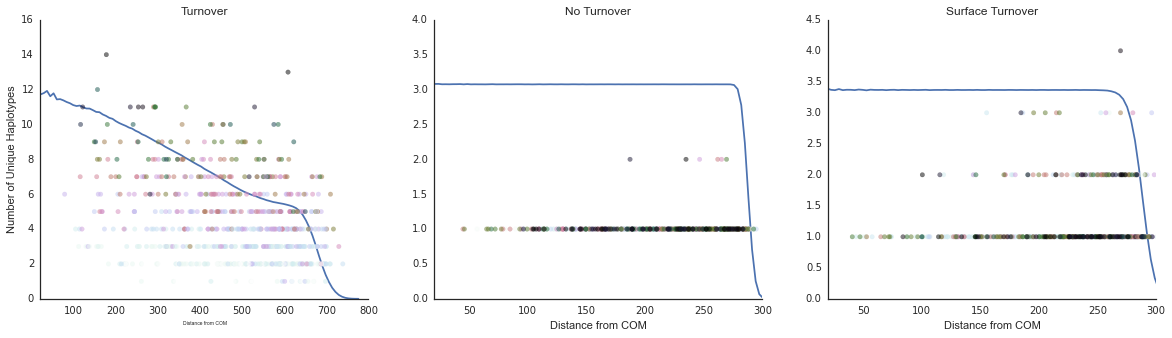

In [345]:
sns.set_style('white')
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Turnover')
plot_hist('./June29outs/1_0_1_outs/pipe_out_Wed_Jun_29_11_54_28_2016/statistics.csv')
r = np.load('./hists/1_0_1/1_0_1_outs_r_meaned.npy')
rho = np.load('./hists/1_0_1/1_0_1_outs_rho_corrected.npy')
plt.plot(r,rho*11)
plt.xlim([20,800])
plt.xlabel('Distance from COM')
plt.ylabel('Number of Unique Haplotypes')
plt.ylim([0,16])
plt.subplot(1,3,2)
plt.title('No Turnover')
plt.xlabel('Distance from COM')
plot_hist('./June29outs/1_0_0_outs/pipe_out_Tue_Jun_28_18_02_22_2016/statistics.csv')
r = np.load('./hists/1_0_0/1_0_0_outs_r_meaned.npy')
rho = np.load('./hists/1_0_0/1_0_0_outs_rho_corrected.npy')
plt.plot(r,rho)
plt.ylim([0,4])
plt.xlim([20,300])
plt.subplot(1,3,3)
plt.title('Surface Turnover')
plot_hist('./June29outs/1_1_1_outs/pipe_out_Wed_Jun_29_12_32_22_2016/statistics.csv')
r = np.load('./hists/1_1_1/1_1_1_outs_r_meaned.npy')
rho = np.load('./hists/1_1_1/1_1_1_outs_rho_corrected.npy')
plt.plot(r,rho)
plt.ylim([0,4.5])
plt.xlim([20,300])
plt.xlabel('Distance from COM')
sns.despine()

22
20
21


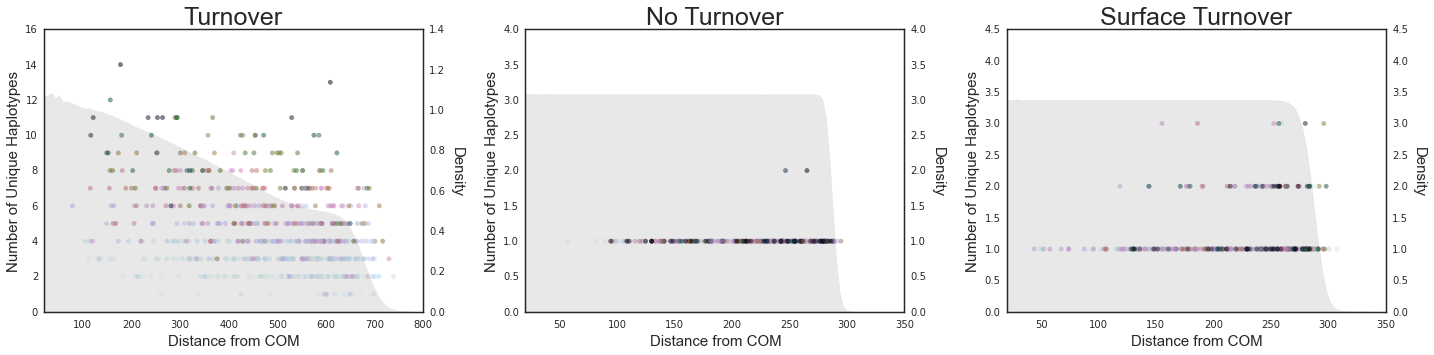

In [357]:
sns.set_style('white')
fig = plt.figure(figsize=(20,5))



ax1 = fig.add_subplot(131)

r = np.load('./hists/1_0_1/1_0_1_outs_r_meaned.npy')
rho = np.load('./hists/1_0_1/1_0_1_outs_rho_corrected.npy')
ax1_r = ax1.twinx()
# ax1_r.plot(r,rho)
ax1_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax1_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)

plot_hist('./June29outs/1_0_1_outs/pipe_out_Wed_Jun_29_11_54_28_2016/statistics.csv', ax1, max_sample=22)

ax1.set_xlim([20,800])
ax1.set_title('Turnover', fontsize=25)
ax1.set_xlabel('Distance from COM', fontsize=15)
ax1.set_ylabel('Number of Unique Haplotypes', fontsize=15)
ax1.set_ylim([0,16])

ax2 = fig.add_subplot(132)

r = np.load('./hists/1_0_0/1_0_0_outs_r_meaned.npy')
rho = np.load('./hists/1_0_0/1_0_0_outs_rho_corrected.npy')

ax2_r = ax2.twinx()
# ax2_r.plot(r,rho, zorder=1)
ax2_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax2_r.set_ylabel('Density', rotation=-90,labelpad=20, fontsize=15)


plot_hist('./June29outs/1_0_0_outs/pipe_out_Tue_Jun_28_18_02_22_2016/statistics.csv', ax2, max_sample=22)


ax2.set_title('No Turnover', fontsize=25)
ax2.set_xlabel('Distance from COM', fontsize=15)
ax2.set_ylim([0,4])
ax2.set_xlim([20,350])
ax2.set_ylabel('Number of Unique Haplotypes', fontsize=15)

ax3 = fig.add_subplot(133)
# ax3.set(zorder=5)
# ax3.
r = np.load('./hists/1_1_1/1_1_1_outs_r_meaned.npy')
rho = np.load('./hists/1_1_1/1_1_1_outs_rho_corrected.npy')
ax3_r = ax3.twinx()
# ax3_r.set(zorder=1)
# ax3_r.plot(r,rho)
ax3_r.fill_between(r, rho,alpha=0.09,color=(0,0,0))
ax3_r.set_ylabel('Density', rotation=-90, labelpad=20, fontsize=15)

plot_hist('./June29outs/1_1_1_outs/pipe_out_Wed_Jun_29_12_32_22_2016/statistics.csv', ax3, max_sample=22)


ax3.set_title('Surface Turnover', fontsize=25)
ax3.set_ylim([0,4.5])
ax3.set_xlim([20,350])
ax3.set_xlabel('Distance from COM', fontsize=15)
ax3.set_ylabel('Number of Unique Haplotypes', fontsize=15)

fig.tight_layout(pad=1, w_pad=2)
# sns.despine(top=True,left=False,right=False)

# cbar = fig.colorbar(ticks=[-1,0,1], orientation='horizontal')

plt.savefig('test2.pdf', dpi=300)
plt.savefig('test2.svg', dpi=300)
plt.savefig('test2.png', dpi=300)

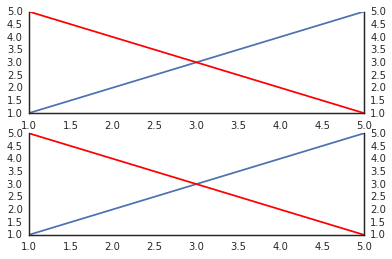

In [292]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot([1,2,3,4,5], [1,2,3,4,5])
ax2 = ax.twinx()
ax2.plot([1,2,3,4,5], [5,4,3,2,1], 'r')
ax3 = fig.add_subplot(212)
ax3.plot([1,2,3,4,5], [1,2,3,4,5])
ax4 = ax3.twinx()
ax4.plot([1,2,3,4,5], [5,4,3,2,1], 'r')
sns.despine(top=True,left=False,right=False)
